In [2]:
print("HELLO DARLING, WELCOME TO YOUR NEW DATA PROJECT\nHAHAaaaaaaa\nLets Start Babe :))))")


HELLO DARLING, WELCOME TO YOUR NEW DATA PROJECT
HAHAaaaaaaa
Lets Start Babe :))))


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [4]:
data_path = r'C:\Users\Helma\Documents\MAHSHID-DATA-PROJECT\P1-Alex-Correlation-movies\Netflix-dataset'
os.chdir(data_path)

df = pd.read_csv('netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
# columns unique values
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
(df.isnull()).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
(df.notnull()).sum()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
df.show_id.value_counts()
# len(unique(df.duration))
df.drop_duplicates(subset = "country").head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [14]:
# np.mean(df[col].isnull())

In [10]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

show_id - 0%
type - 0%
title - 0%
director - 30%
cast - 9%
country - 9%
date_added - 0%
release_year - 0%
rating - 0%
duration - 0%
listed_in - 0%
description - 0%


In [11]:
# Data Types for our columns

print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [17]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,1.000000,-0.130476,1.000000,0.584886,0.822628,0.168347,0.784062,0.291746,0.092539,0.093346,0.099941,0.996781
type,-0.130476,1.000000,-0.130476,-0.589931,-0.136780,-0.089483,-0.030899,-0.118298,-0.045354,-0.526013,0.157325,-0.130743
title,1.000000,-0.130476,1.000000,0.584886,0.822628,0.168347,0.784062,0.291746,0.092539,0.093346,0.099941,0.996781
director,0.584886,-0.589931,0.584886,1.000000,0.490857,0.166406,0.420564,0.191853,0.061722,0.309006,-0.039061,0.586918
cast,0.822628,-0.136780,0.822628,0.490857,1.000000,0.140633,0.621311,0.256592,0.061984,0.059499,0.114501,0.823019
country,0.168347,-0.089483,0.168347,0.166406,0.140633,1.000000,0.131138,0.057427,0.030073,0.004825,-0.037284,0.168730
date_added,0.784062,-0.030899,0.784062,0.420564,0.621311,0.131138,1.000000,0.248456,0.055445,0.070610,0.083016,0.781021
release_year,0.291746,-0.118298,0.291746,0.191853,0.256592,0.057427,0.248456,1.000000,0.077646,0.101272,0.071171,0.290917
rating,0.092539,-0.045354,0.092539,0.061722,0.061984,0.030073,0.055445,0.077646,1.000000,0.073024,-0.027527,0.091061
duration,0.093346,-0.526013,0.093346,0.309006,0.059499,0.004825,0.070610,0.101272,0.073024,1.000000,-0.090366,0.093639


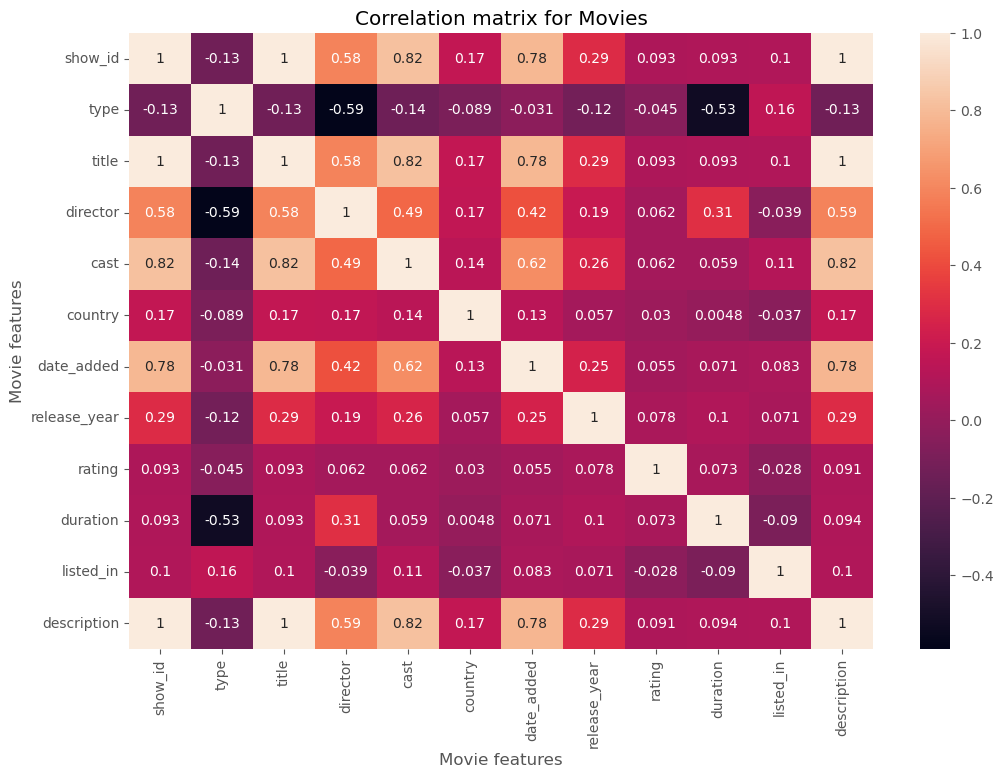

In [18]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

<Axes: >

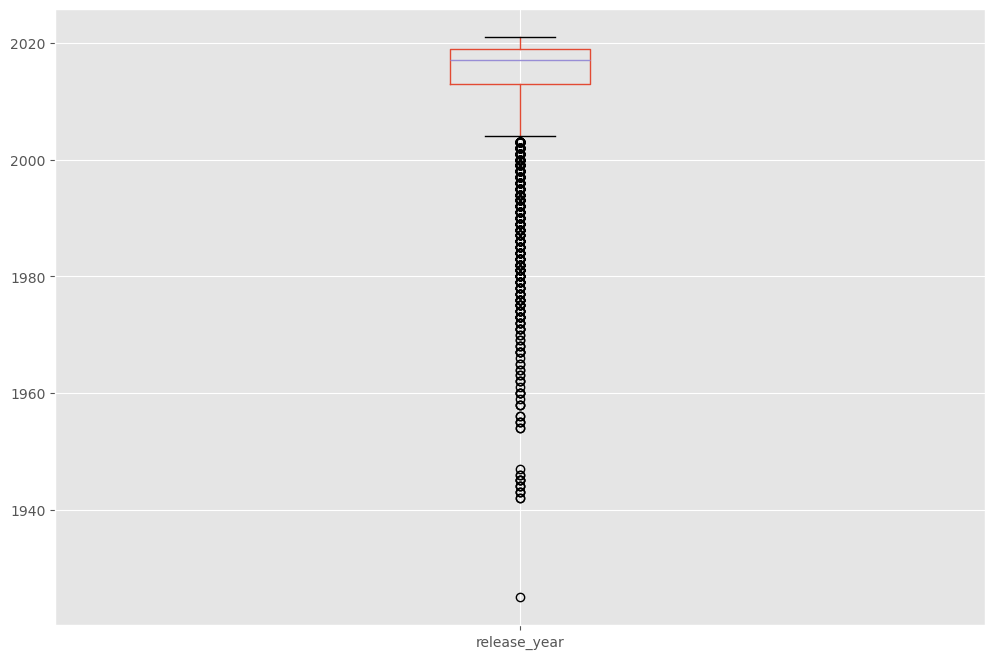

In [12]:
# Are there any Outliers?

df.boxplot(column=['release_year'])

In [16]:
df.drop_duplicates().head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [15]:
# Order our Data a little bit to see

df.sort_values(by=['release_year'], inplace=False, ascending=False).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

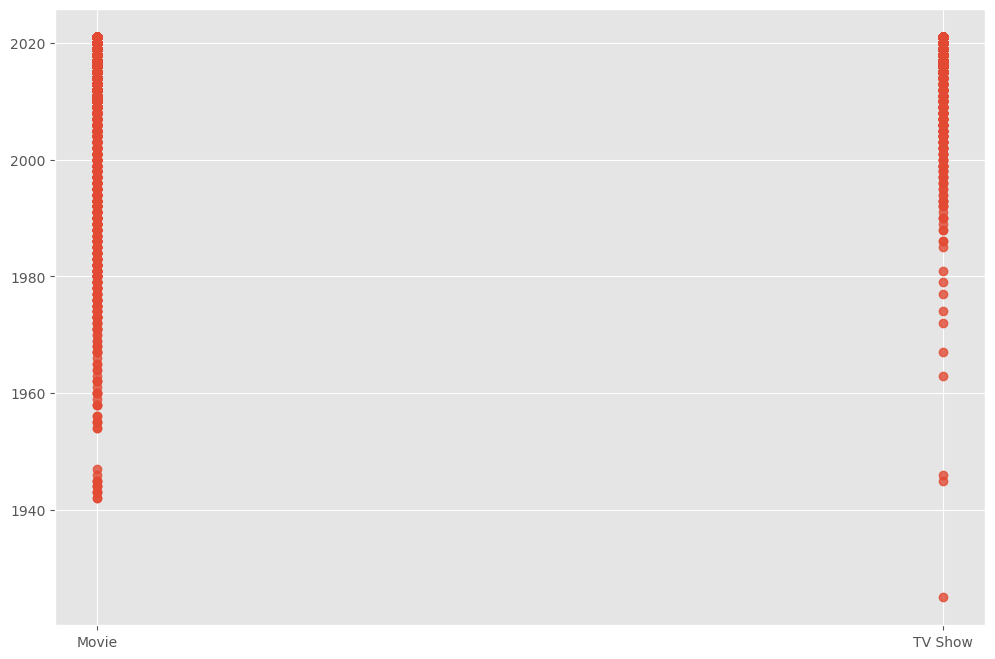

In [54]:
sns.regplot(x="type", y="release_year", data=df)

TypeError: can't multiply sequence by non-int of type 'float'

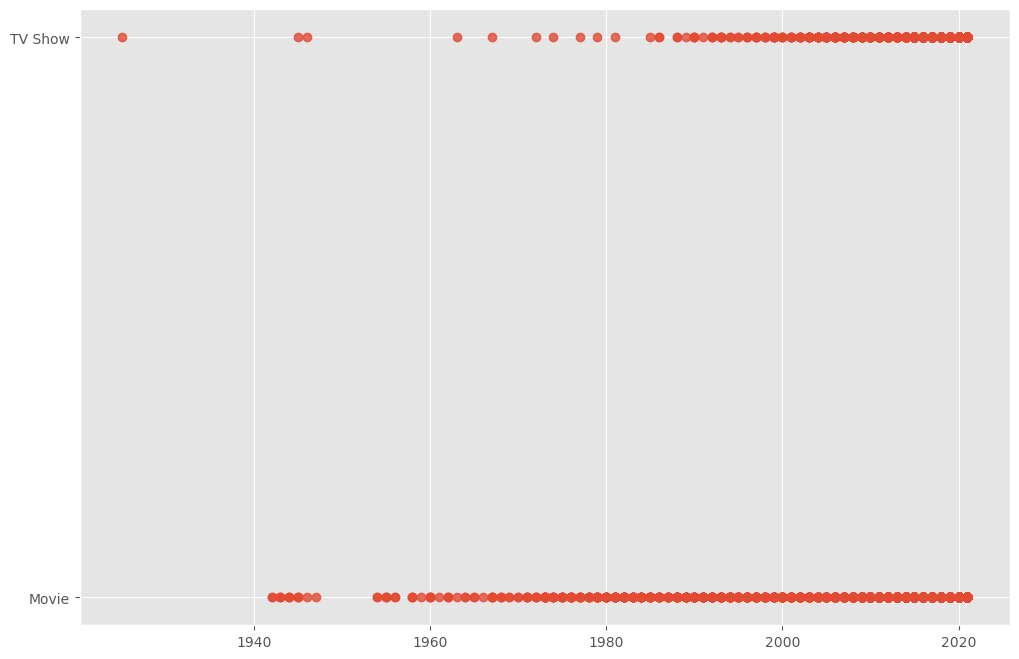

In [56]:
sns.regplot(x="release_year", y="type", data=df)

In [57]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

ValueError: could not convert string to float: 's1'

In [58]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

ValueError: could not convert string to float: 's1'

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined

In [19]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

show_id      show_id         1.000000
             type           -0.130476
             title           1.000000
             director        0.584886
             cast            0.822628
                               ...   
description  release_year    0.290917
             rating          0.091061
             duration        0.093639
             listed_in       0.100860
             description     1.000000
Length: 144, dtype: float64


In [20]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

director     type          -0.589931
type         director      -0.589931
duration     type          -0.526013
type         duration      -0.526013
cast         type          -0.136780
                              ...   
title        show_id        1.000000
type         type           1.000000
show_id      title          1.000000
listed_in    listed_in      1.000000
description  description    1.000000
Length: 144, dtype: float64


In [22]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5)&(abs(sorted_pairs) < 1)]

print(strong_pairs)

director     type          -0.589931
type         director      -0.589931
duration     type          -0.526013
type         duration      -0.526013
director     title          0.584886
show_id      director       0.584886
director     show_id        0.584886
title        director       0.584886
director     description    0.586918
description  director       0.586918
cast         date_added     0.621311
date_added   cast           0.621311
             description    0.781021
description  date_added     0.781021
show_id      date_added     0.784062
title        date_added     0.784062
date_added   show_id        0.784062
             title          0.784062
show_id      cast           0.822628
title        cast           0.822628
cast         title          0.822628
             show_id        0.822628
             description    0.823019
description  cast           0.823019
show_id      description    0.996781
title        description    0.996781
description  title          0.996781
 

In [23]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,0,1975,2295,-1,603,1711,2020,7,210,274,2577
1,1111,1,1091,-1,409,426,1706,2021,11,110,414,1762
2,2222,1,2651,2105,6296,-1,1706,2021,11,0,242,7341
3,3333,1,3506,-1,-1,-1,1706,2021,11,0,297,3617
4,4444,1,3861,-1,4815,251,1706,2021,11,110,393,4416
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,8671,0,8770,979,4677,603,1419,2007,8,70,269,895
8803,8672,1,8773,-1,-1,-1,788,2018,14,110,424,8483
8804,8673,0,8774,3631,3231,603,1366,2009,8,206,207,5228
8805,8674,0,8777,3247,7061,603,665,2006,6,206,125,3315


In [24]:
df_numerized.corr(method='pearson')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,1.000000,-0.125233,0.108167,0.063996,-0.012943,0.073077,-0.014767,-0.243885,-0.128210,0.091893,-0.071455,0.008412
type,-0.125233,1.000000,0.025439,-0.619439,-0.036161,-0.055552,-0.021862,0.181710,0.287269,-0.380907,0.304750,0.021813
title,0.108167,0.025439,1.000000,-0.016618,0.041397,0.022365,0.002270,-0.017802,-0.016412,-0.029823,0.017286,0.008079
director,0.063996,-0.619439,-0.016618,1.000000,0.054829,0.021568,0.011743,-0.153754,-0.183162,0.201431,-0.231967,-0.010546
cast,-0.012943,-0.036161,0.041397,0.054829,1.000000,-0.039134,-0.000479,-0.041140,-0.031608,-0.017975,-0.033902,-0.032282
country,0.073077,-0.055552,0.022365,0.021568,-0.039134,1.000000,-0.013329,-0.103583,-0.190365,0.120703,-0.006425,0.033460
date_added,-0.014767,-0.021862,0.002270,0.011743,-0.000479,-0.013329,1.000000,-0.000012,0.011388,-0.002325,-0.009981,-0.002684
release_year,-0.243885,0.181710,-0.017802,-0.153754,-0.041140,-0.103583,-0.000012,1.000000,0.247384,-0.005371,0.197579,-0.018933
rating,-0.128210,0.287269,-0.016412,-0.183162,-0.031608,-0.190365,0.011388,0.247384,1.000000,-0.017775,0.196122,0.039545
duration,0.091893,-0.380907,-0.029823,0.201431,-0.017975,0.120703,-0.002325,-0.005371,-0.017775,1.000000,-0.049291,-0.006135


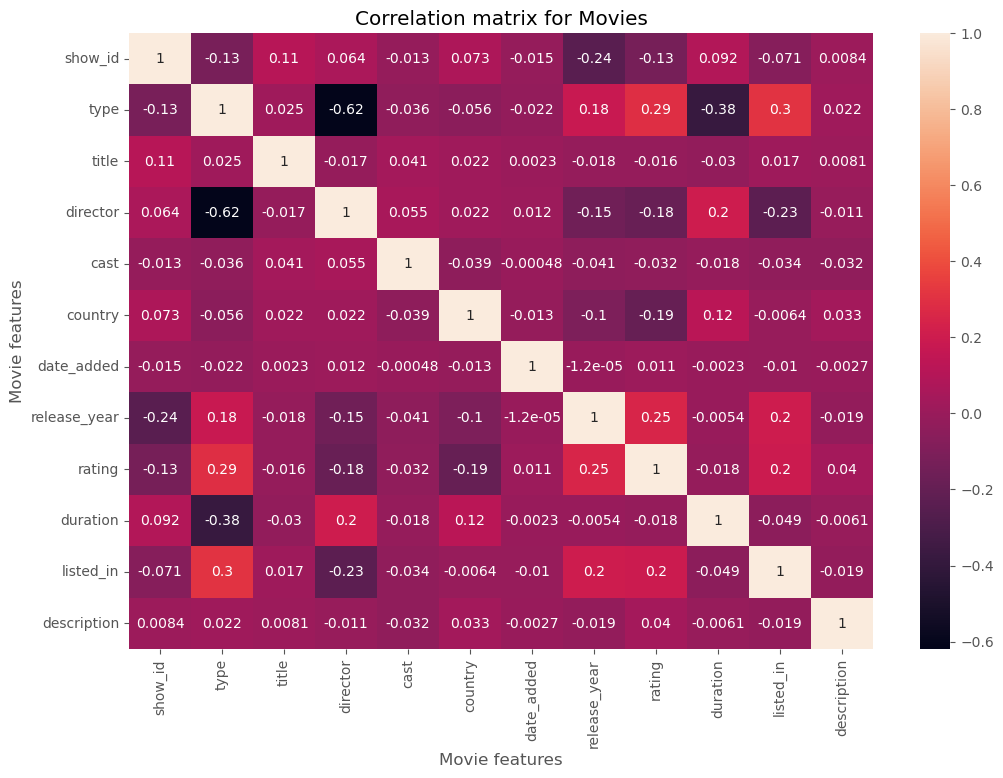

In [25]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [26]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [27]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

NameError: name 'cat_columns' is not defined

C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.5% of the points

<Axes: xlabel='rating', ylabel='director'>

C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Helma\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.1% of the points

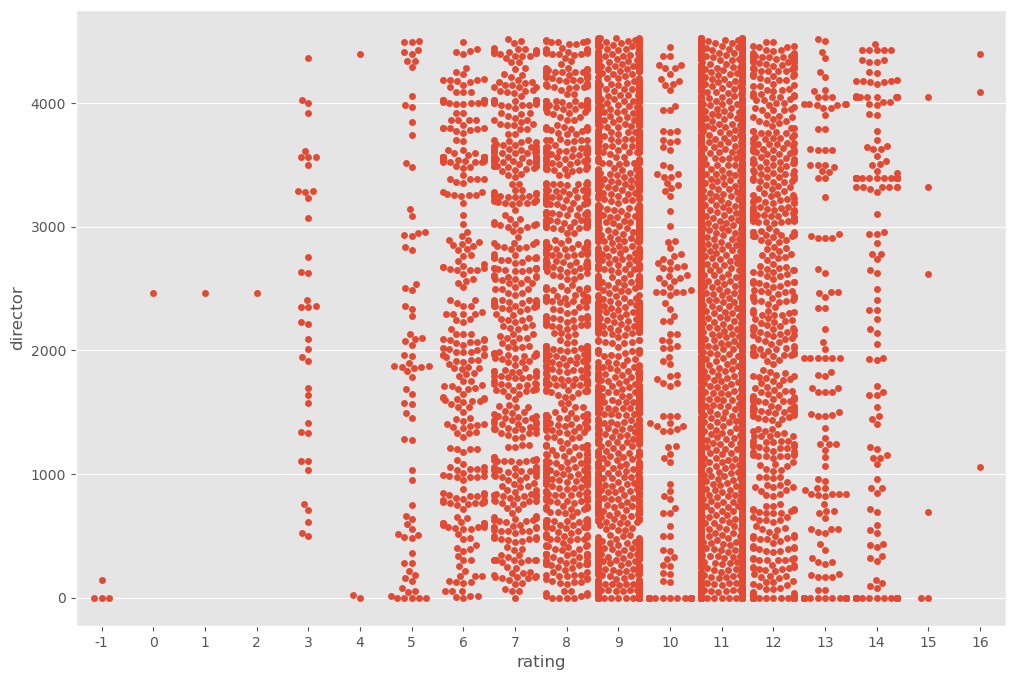

In [28]:
sns.swarmplot(x="rating", y="director", data=df)

<Axes: xlabel='rating', ylabel='director'>

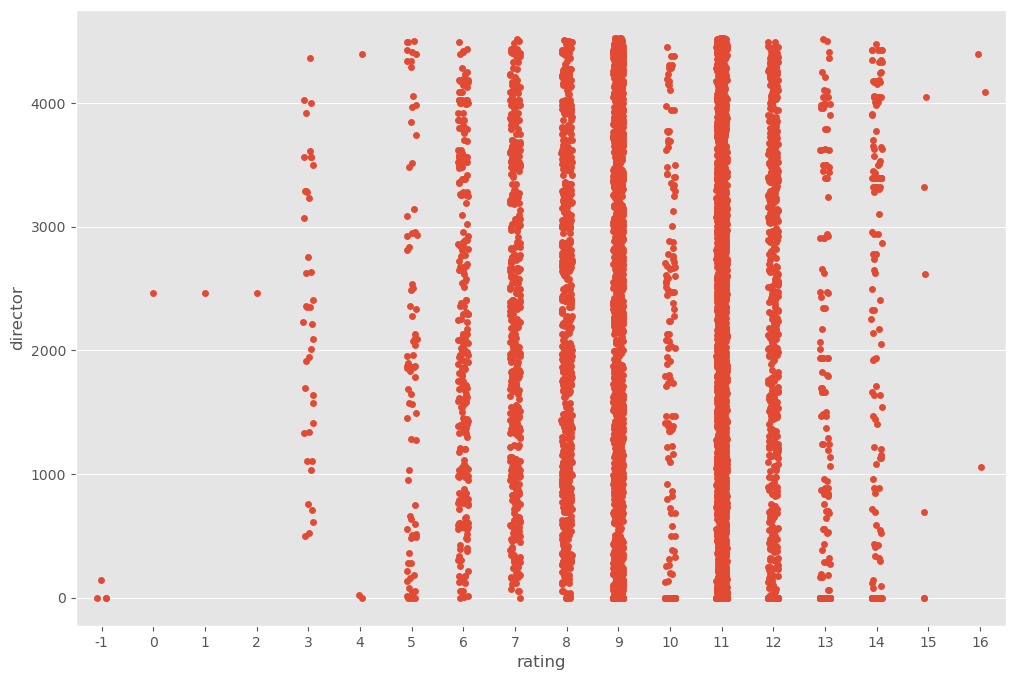

In [29]:
sns.stripplot(x="rating", y="director", data=df)

<Axes: xlabel='director', ylabel='rating'>

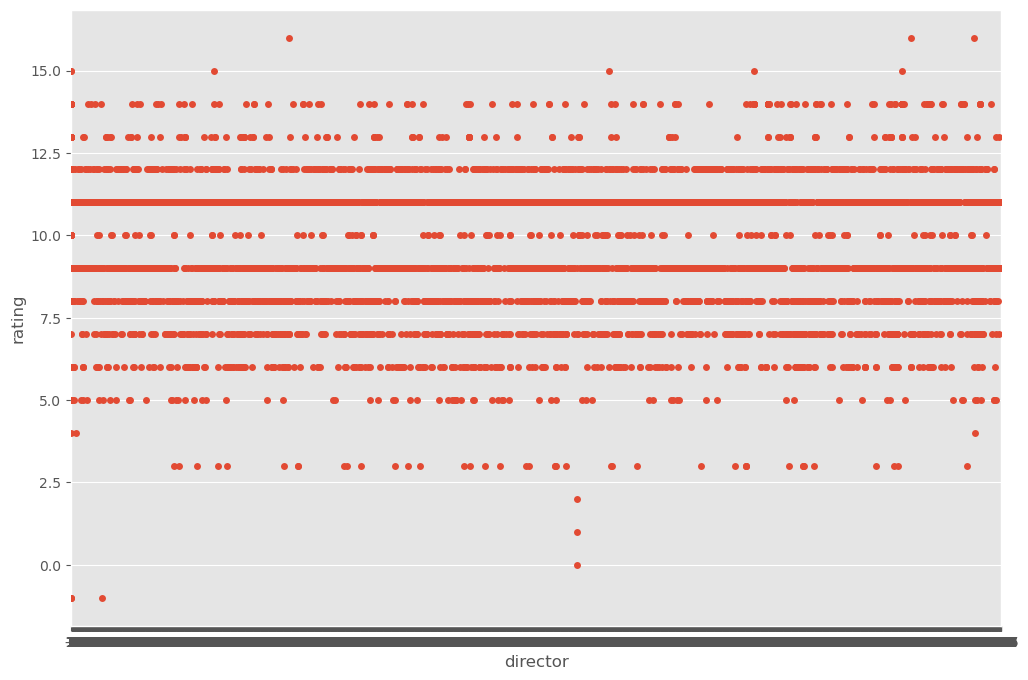

In [30]:
sns.stripplot(x="director", y="rating", data=df)